In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
plt.style.use('seaborn-v0_8-poster')

## Understanding the Dynamics of Energy Consumption for Sustainable Living

###  Brief Description:
This project delves into the intricate interplay between energy consumption patterns and the quest for sustainable living within a household context. Through the analysis of a comprehensive dataset encompassing key parameters such as appliance usage, indoor and outdoor temperatures, humidity levels, and meteorological data, my primary aim is to unveil a compelling narrative that provides insights into optimizing energy consumption for a more sustainable lifestyle. Employing data analysis and visually engaging representations, I endeavor to articulate the story concealed within energy use and offer pragmatic recommendations for fostering a greener future.

### Why This Topic and Project:

I embarked on this project as a response to an invitation to attend SES 2023 (Student Energy Summit 2023). The summit, being the world's largest youth-led energy conference, focuses on the energy transition, a critical phase in history. As we witness the transformation of the energy landscape, it became evident that the youth's perspective and involvement are crucial, as it's our future that's at stake.

The energy transition unfolding before us is a pivotal moment in history, and my interest in contributing to a sustainable and equitable energy future led me to choose this project. By using data as a tool, I aim to offer valuable insights into energy consumption patterns that can aid in making informed decisions towards a greener and more sustainable world.


In [4]:
#https://www.kaggle.com/datasets/sohommajumder21/appliances-energy-prediction-data-set/
# https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction
df = pd.read_csv("./energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Data Resources: 

In the pursuit of a suitable project, I extensively researched various data providers, including governmental and non-governmental organizations. After careful evaluation, I selected a dataset from UCI, which I deemed exceptionally fitting for this endeavor due to its comprehensive nature and relevance to energy consumption analysis. This dataset, with its rich and diverse information, served as the foundation for my exploration of energy consumption patterns and sustainability

https://www.kaggle.com/datasets/sohommajumder21/appliances-energy-prediction-data-set/
https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

My dataset encompasses a diverse array of information, including timestamps, appliance energy consumption, temperature measurements, humidity levels, and meteorological conditions.


- 	date time year-month-day hour:minute:second
- 	Appliances, energy use in Wh (target variable for prediction)
- 	lights, energy use of light fixtures in the house in Wh
- 	T1, Temperature in kitchen area, in Celsius
- 	RH_1, Humidity in kitchen area, in %
- 	T2, Temperature in living room area, in Celsius
- 	RH_2, Humidity in living room area, in %
- 	T3, Temperature in laundry room area
- 	RH_3, Humidity in laundry room area, in %
- 	T4, Temperature in office room, in Celsius
- 	RH_4, Humidity in office room, in %
- 	T5, Temperature in bathroom, in Celsius
- 	RH_5, Humidity in bathroom, in %
- 	T6, Temperature outside the building (north side), in Celsius
- 	RH_6, Humidity outside the building (north side), in %
- 	T7, Temperature in ironing room , in Celsius
- 	RH_7, Humidity in ironing room, in %
- 	T8, Temperature in teenager room 2, in Celsius
- 	RH_8, Humidity in teenager room 2, in %
- 	T9, Temperature in parents room, in Celsius
- 	RH_9, Humidity in parents room, in %
- 	To, Temperature outside (from Chievres weather station), in Celsius
- 	Pressure (from Chievres weather station), in mm Hg
- 	RH_out, Humidity outside (from Chievres weather station), in %
- 	Wind speed (from Chievres weather station), in m/s
- 	Visibility (from Chievres weather station), in km
- 	Tdewpoint (from Chievres weather station), Â°C
- 	rv1, Random variable 1, nondimensional
- 	rv2, Random variable 2, nondimensional

# Exploratory Data Analysis

In [5]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
df.describe()
#HAVE A BASIC IDEAD ABOUT THE DATA

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
df.info()
#HAVE A BASIC IDEAD ABOUT THE DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

df.set_index('date', inplace=True)
# CLEAR AND FORMAT THE DATA

In [9]:
df.rename(columns={"T1":"kitchen_tem","T2":"living_tem","T3":"laundry_tem","T4":"office_tem",
                   "T5":"bathroom_tem","T6":"outside_N_tem","T7":"ironing_tem","T8":"teenager_tem",
                   "T9":"parent_tem","T_out":"out_tem","RH_1":"kitchen_humid","RH_2":"living_humid",
                   "RH_3":"laundry_humid","RH_4":"office_humid","RH_5":"bathroom_humid","RH_6":"outside_N_humid",
                   "RH_7":"ironing_humid","RH_8":"teenager_humid","RH_9":"parent_humid","RH_out":"out_humid"}, inplace=True)
# RENAME THE COLUMNS NAME 

### Calculate inside/outside Humidity/Tem

In [10]:
# COUNT AVG
humid_columns = [col for col in df.columns if ('humid' in col) and ('out' not in col)]
avg_humid_df = df[humid_columns].mean(axis=1)
df["inside_avg_humid"] = avg_humid_df

tem_columns = [col for col in df.columns if ('tem' in col) and ('out' not in col)]
avg_tem_df = df[tem_columns].mean(axis=1)
df["inside_avg_tem"] = avg_tem_df

humid_columns = [col for col in df.columns if ('humid' in col) and ('out' in col)]
avg_humid_df = df[humid_columns].mean(axis=1)
df["outside_avg_humid"] = avg_humid_df

tem_columns = [col for col in df.columns if ('tem' in col) and ('out' in col)]
avg_tem_df = df[tem_columns].mean(axis=1)
df["outside_avg_tem"] = avg_tem_df

df.to_csv("energy.csv")

In [11]:
df_daily = df.groupby(df.index.date).mean()
df_daily.to_csv("energy.csv")

## Applicance VS Lights Energy Consumption

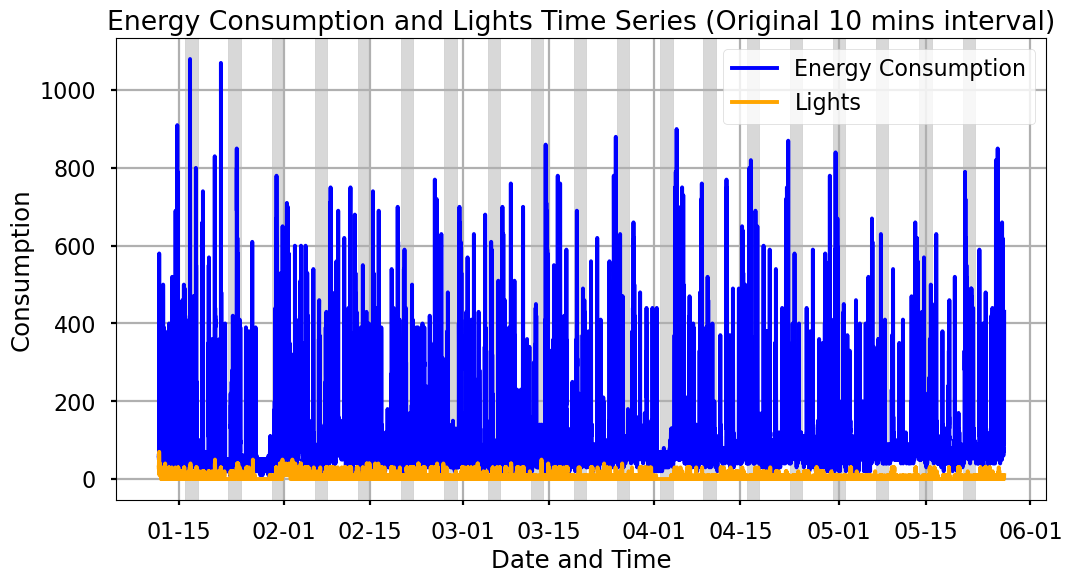

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Appliances'], label='Energy Consumption', color='blue')
plt.plot(df.index, df['lights'], label='Lights', color='orange')
plt.xlabel('Date and Time')
plt.ylabel('Consumption')
plt.title('Energy Consumption and Lights Time Series (Original 10 mins interval)')
plt.legend()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')  # Specify the desired date format
plt.gca().xaxis.set_major_formatter(date_format)  # Apply the format to the x-axis

ax = plt.gca()
for i, day in enumerate(df.index.dayofweek):
    if day >= 5:  # 5 and 6 represent Saturday and Sunday
        if i == 0 or df.index[i - 1].dayofweek < 5:
            start_date = df.index[i]
        if i == len(df.index) - 1 or df.index[i + 1].dayofweek < 5:
            end_date = df.index[i]
            ax.axvspan(start_date, end_date, color='gray', alpha=0.3)

plt.show()

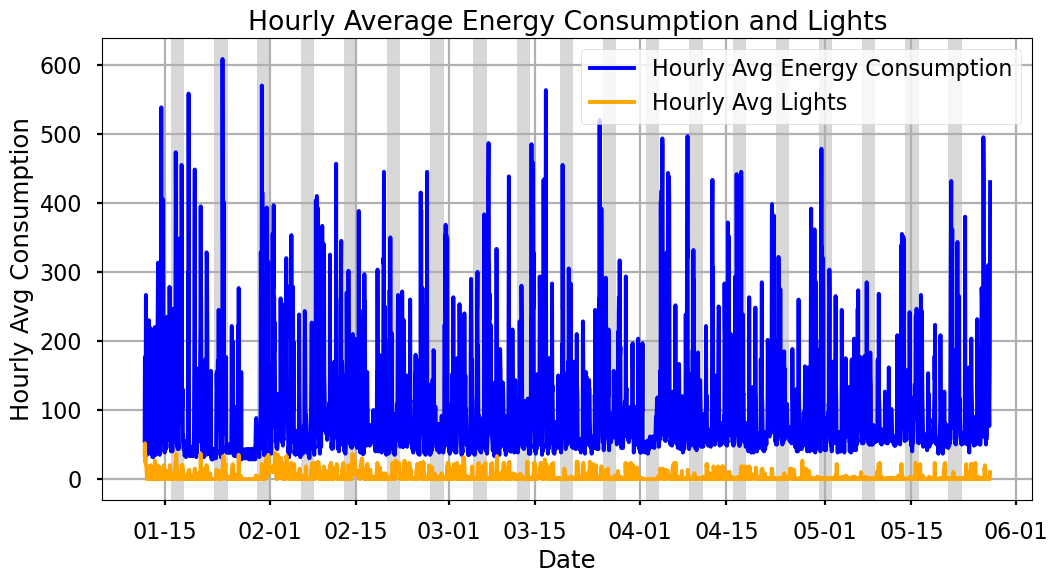

In [13]:
# Resample the data to calculate daily averages
daily_avg = df.resample('H').mean()

# Plot the time series graph for daily average energy and lights
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['Appliances'], label='Hourly Avg Energy Consumption', color='blue')
plt.plot(daily_avg.index, daily_avg['lights'], label='Hourly Avg Lights', color='orange')
plt.xlabel('Date')
plt.ylabel('Hourly Avg Consumption')
plt.title('Hourly Average Energy Consumption and Lights')
plt.legend()
plt.grid(True)

date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

ax = plt.gca()
for i, day in enumerate(df.index.dayofweek):
    if day >= 5:  # 5 and 6 represent Saturday and Sunday
        if i == 0 or df.index[i - 1].dayofweek < 5:
            start_date = df.index[i]
        if i == len(df.index) - 1 or df.index[i + 1].dayofweek < 5:
            end_date = df.index[i]
            ax.axvspan(start_date, end_date, color='gray', alpha=0.3)

plt.show()


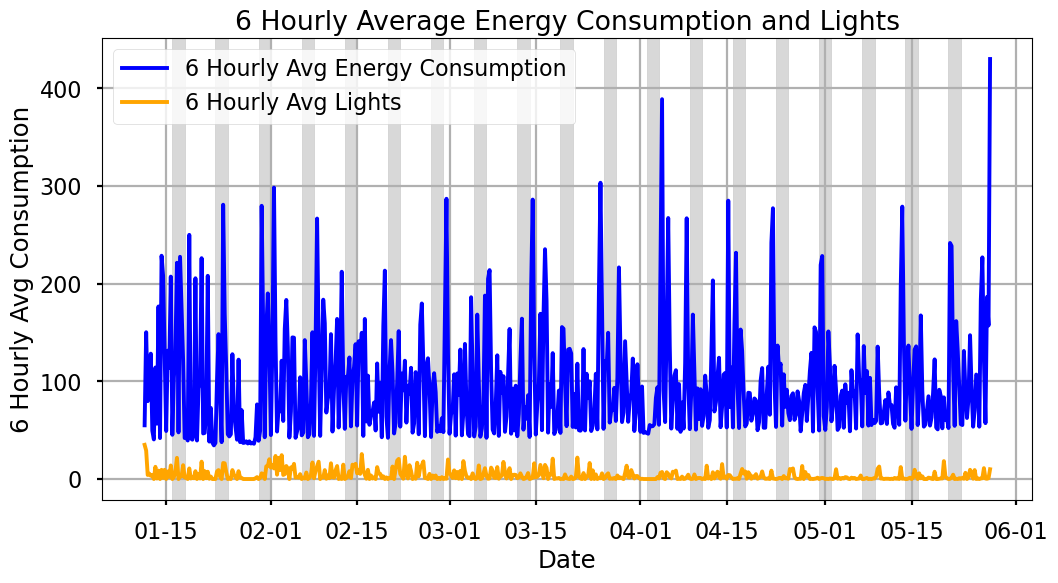

In [14]:
daily_avg = df.resample('6H').mean()

# Plot the time series graph for 6-hour average energy and lights
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['Appliances'], label='6 Hourly Avg Energy Consumption', color='blue')
plt.plot(daily_avg.index, daily_avg['lights'], label='6 Hourly Avg Lights', color='orange')
plt.xlabel('Date')
plt.ylabel('6 Hourly Avg Consumption')
plt.title('6 Hourly Average Energy Consumption and Lights')
plt.legend()
plt.grid(True)

date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

ax = plt.gca()
for i, day in enumerate(df.index.dayofweek):
    if day >= 5:  # 5 and 6 represent Saturday and Sunday
        if i == 0 or df.index[i - 1].dayofweek < 5:
            start_date = df.index[i]
        if i == len(df.index) - 1 or df.index[i + 1].dayofweek < 5:
            end_date = df.index[i]
            ax.axvspan(start_date, end_date, color='gray', alpha=0.3)

plt.show()


17:00 --> 23:00 --> 5:00 --> 11:00;

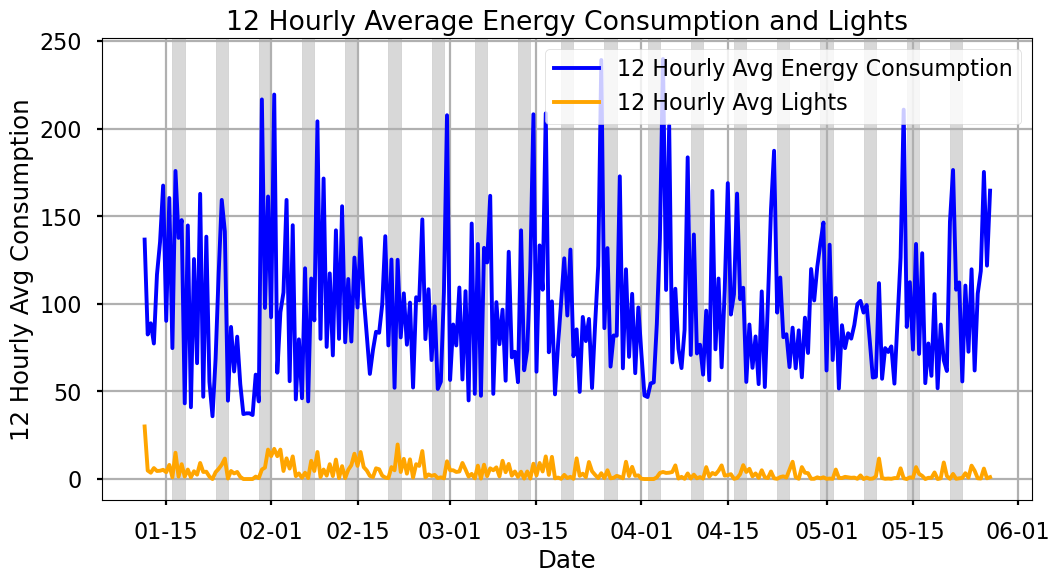

In [15]:
daily_avg = df.resample('12H').mean()

# Plot the time series graph for 6-hour average energy and lights
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['Appliances'], label='12 Hourly Avg Energy Consumption', color='blue')
plt.plot(daily_avg.index, daily_avg['lights'], label='12 Hourly Avg Lights', color='orange')
plt.xlabel('Date')
plt.ylabel('12 Hourly Avg Consumption')
plt.title('12 Hourly Average Energy Consumption and Lights')
plt.legend()
plt.grid(True)

date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

ax = plt.gca()
for i, day in enumerate(df.index.dayofweek):
    if day >= 5:  # 5 and 6 represent Saturday and Sunday
        if i == 0 or df.index[i - 1].dayofweek < 5:
            start_date = df.index[i]
        if i == len(df.index) - 1 or df.index[i + 1].dayofweek < 5:
            end_date = df.index[i]
            ax.axvspan(start_date, end_date, color='gray', alpha=0.3)

plt.show()


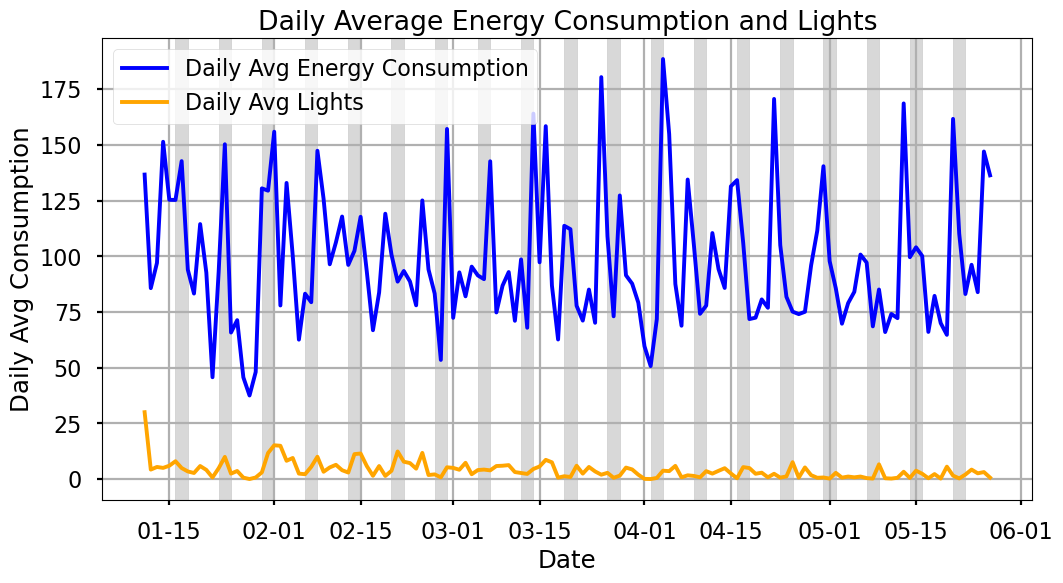

In [16]:
# Resample the data to calculate daily averages
daily_avg = df.resample('D').mean()

# Plot the time series graph for daily average energy and lights
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['Appliances'], label='Daily Avg Energy Consumption', color='blue')
plt.plot(daily_avg.index, daily_avg['lights'], label='Daily Avg Lights', color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Avg Consumption')
plt.title('Daily Average Energy Consumption and Lights')
plt.legend()
plt.grid(True)

date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

ax = plt.gca()
for i, day in enumerate(df.index.dayofweek):
    if day >= 5:  # 5 and 6 represent Saturday and Sunday
        if i == 0 or df.index[i - 1].dayofweek < 5:
            start_date = df.index[i]
        if i == len(df.index) - 1 or df.index[i + 1].dayofweek < 5:
            end_date = df.index[i]
            ax.axvspan(start_date, end_date, color='gray', alpha=0.3)

plt.show()


array([[<Axes: xlabel='Appliances', ylabel='Appliances'>,
        <Axes: xlabel='lights', ylabel='Appliances'>,
        <Axes: xlabel='out_humid', ylabel='Appliances'>],
       [<Axes: xlabel='Appliances', ylabel='lights'>,
        <Axes: xlabel='lights', ylabel='lights'>,
        <Axes: xlabel='out_humid', ylabel='lights'>],
       [<Axes: xlabel='Appliances', ylabel='out_humid'>,
        <Axes: xlabel='lights', ylabel='out_humid'>,
        <Axes: xlabel='out_humid', ylabel='out_humid'>]], dtype=object)

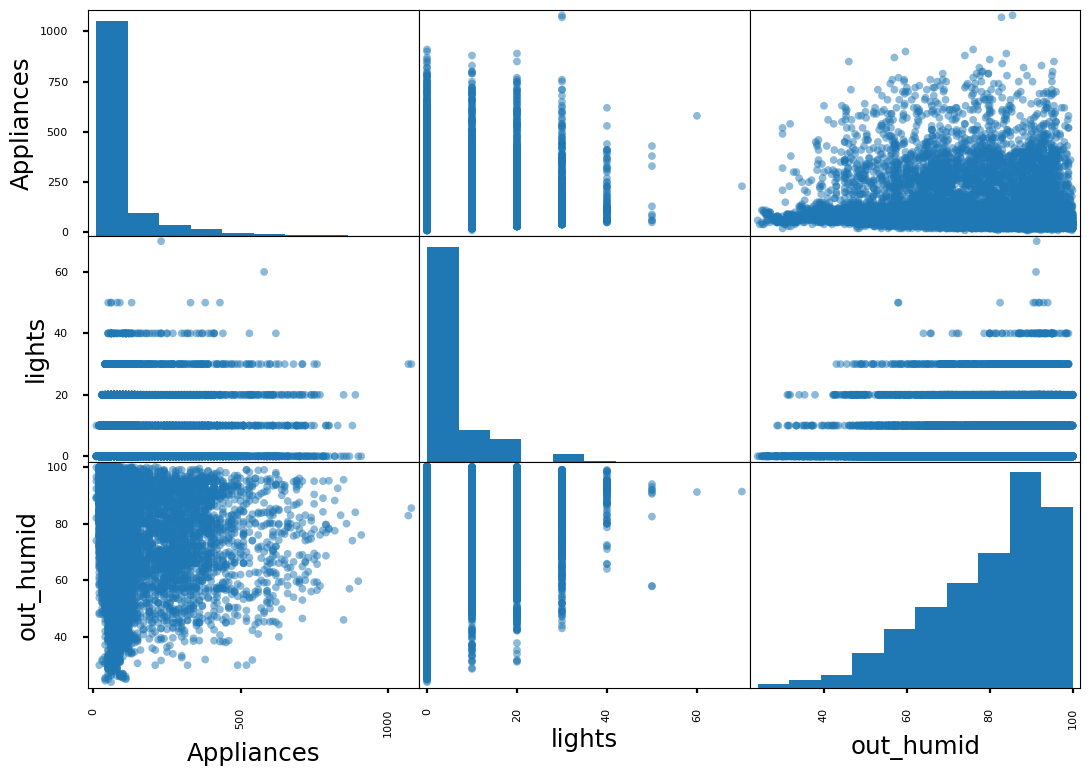

In [17]:
df_slice = df[["Appliances","lights",'out_humid']]
pd.plotting.scatter_matrix(df_slice)

## All variables Correlation

In [18]:
df.corr()

,Appliances,lights,kitchen_tem,kitchen_humid,living_tem,living_humid,laundry_tem,laundry_humid,office_tem,office_humid,...,out_humid,Windspeed,Visibility,Tdewpoint,rv1,rv2,inside_avg_humid,inside_avg_tem,outside_avg_humid,outside_avg_tem
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,-0.152282,0.087122,0.000230,0.015357,-0.011145,-0.011145,-0.020075,0.054740,-0.112709,0.109712
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,0.068543,0.060281,0.020038,-0.036331,0.000521,0.000521,0.095659,-0.079426,0.134756,-0.077369
kitchen_tem,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,-0.345481,-0.087654,-0.076210,0.571333,-0.006203,-0.006203,0.056465,0.947711,-0.563680,0.672093
kitchen_humid,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.274126,0.204932,-0.021057,0.639125,-0.000699,-0.000699,0.868926,0.150220,0.271801,0.329707
living_tem,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,-0.505291,0.052495,-0.069721,0.582632,-0.011087,-0.011087,0.133605,0.813093,-0.593857,0.802069
living_humid,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.584911,0.069190,-0.005368,0.499154,0.006275,0.006275,0.777325,-0.004383,0.483802,0.010616
laundry_tem,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,-0.281718,-0.100776,-0.102310,0.645909,-0.005194,-0.005194,0.098622,0.937328,-0.565215,0.697116
laundry_humid,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,0.356192,0.263188,0.017041,0.414398,-0.000477,-0.000477,0.902498,-0.114229,0.495048,0.096744
office_tem,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,-0.388602,-0.185747,-0.104768,0.519504,-0.001815,-0.001815,-0.047433,0.940873,-0.642225,0.661704
office_humid,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,0.336813,0.300192,0.002636,0.616508,-0.001787,-0.001787,0.925391,0.019850,0.399690,0.276761


<Axes: >

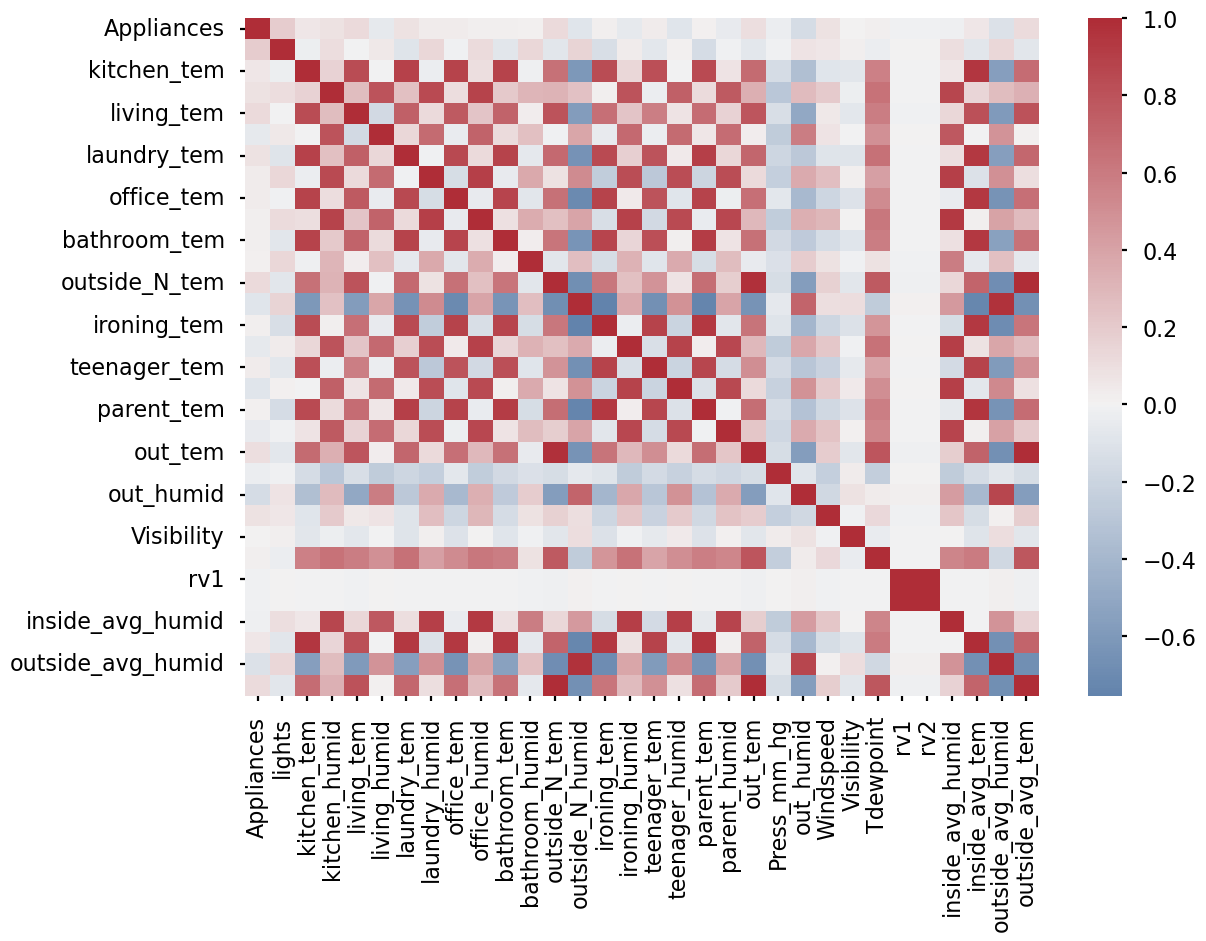

In [19]:
cmap = sns.diverging_palette(250, 10, s=75, l=40, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, center=0)

<Axes: >

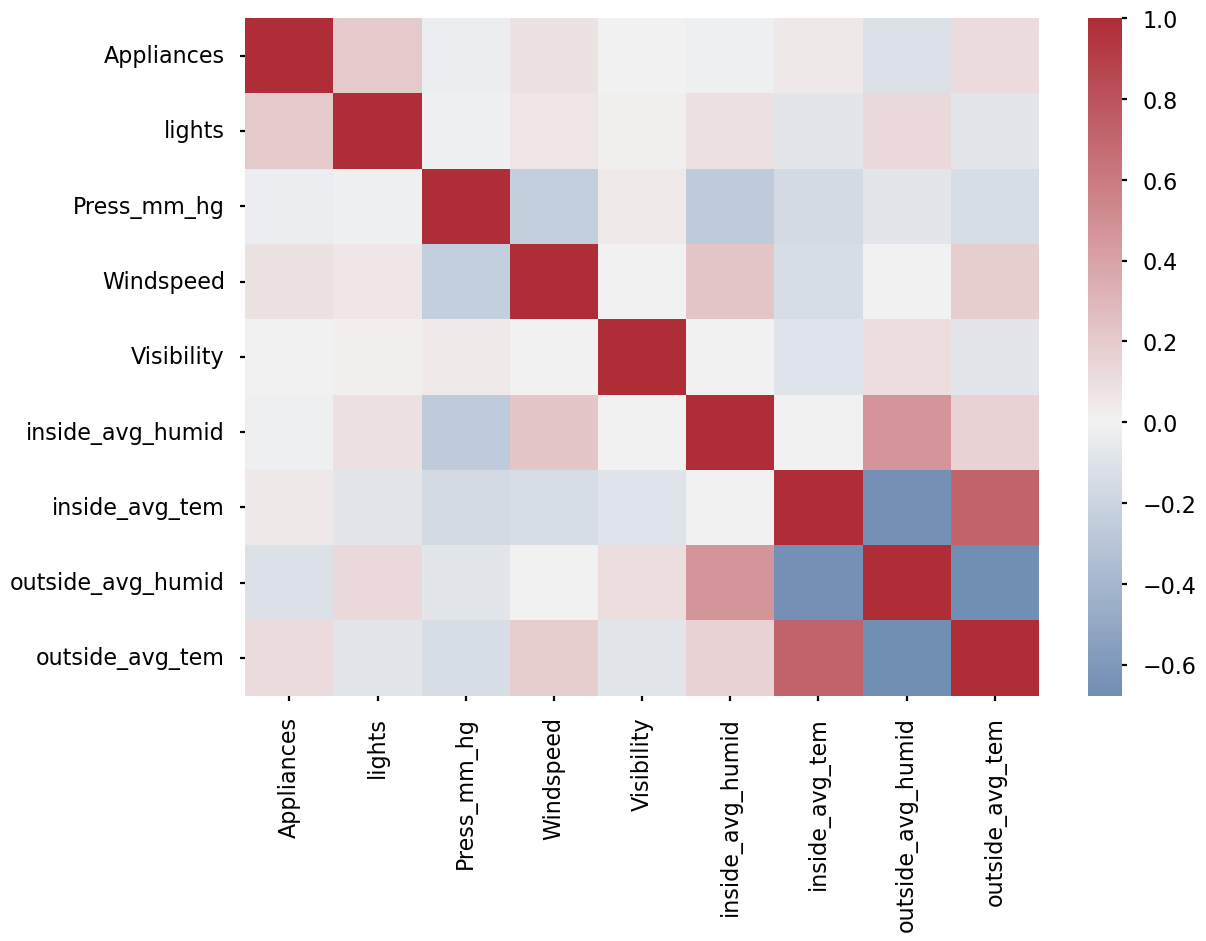

In [21]:
sub_df = df[['Appliances', 'lights', 'Press_mm_hg', 'Windspeed', 'Visibility', 'inside_avg_humid',
       'inside_avg_tem', 'outside_avg_humid', 'outside_avg_tem']]
sns.heatmap(sub_df.corr(), cmap=cmap, center=0)

### Applicances VS temperature / humidity

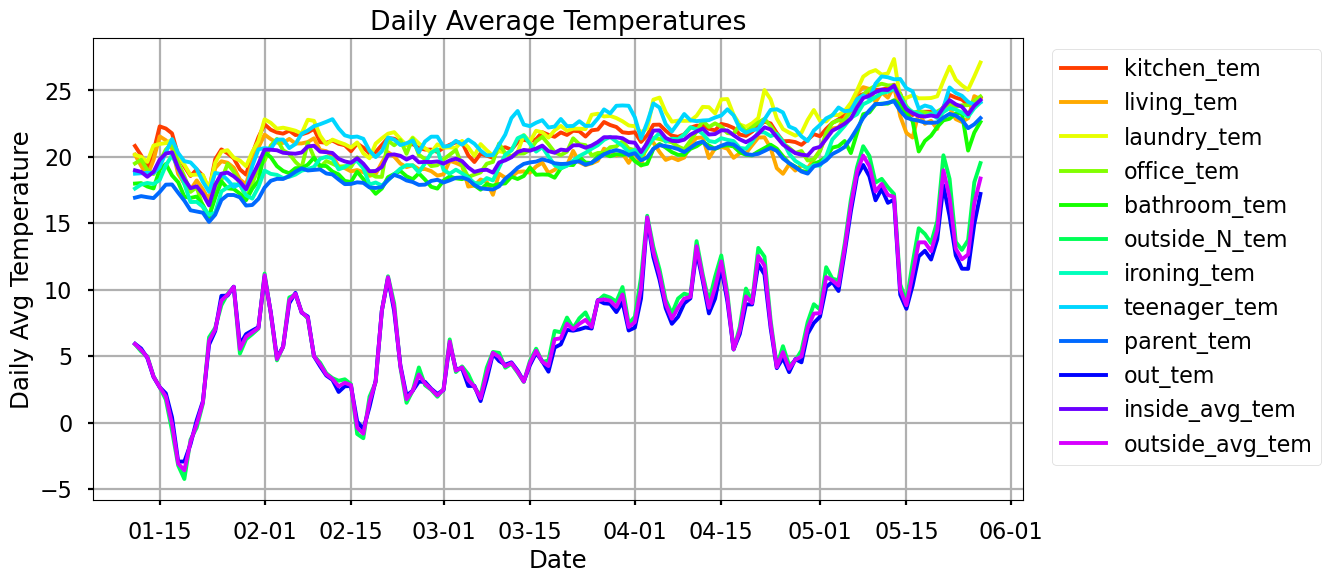

In [22]:
daily_avg = df.resample('D').mean()

plt.figure(figsize=(12, 6))

temperature_columns = [col for col in df.columns if 'tem' in col]
cmap = sns.color_palette("gist_rainbow", n_colors=len(temperature_columns))  # Use a colormap with unique colors for each temperature column

for i, col in enumerate(temperature_columns):
    if col in ['tem_inside_avg', 'tem_outside_avg']:
        # Highlight "tem_inside_avg" and "tem_outside_avg" with a different line style or color
        plt.plot(daily_avg.index, daily_avg[col], label=f'{col}', color=cmap[i], linewidth=4)
    else:
        plt.plot(daily_avg.index, daily_avg[col], label=f'{col}', color=cmap[i])

#     plt.plot(daily_avg.index, daily_avg[col], label=f'{col}', color=cmap[i])

plt.xlabel('Date')
plt.ylabel('Daily Avg Temperature')
plt.title('Daily Average Temperatures')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))  # Place legend outside the plot
plt.grid(True)

date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()

Upper --> Inside // Down --> Outside

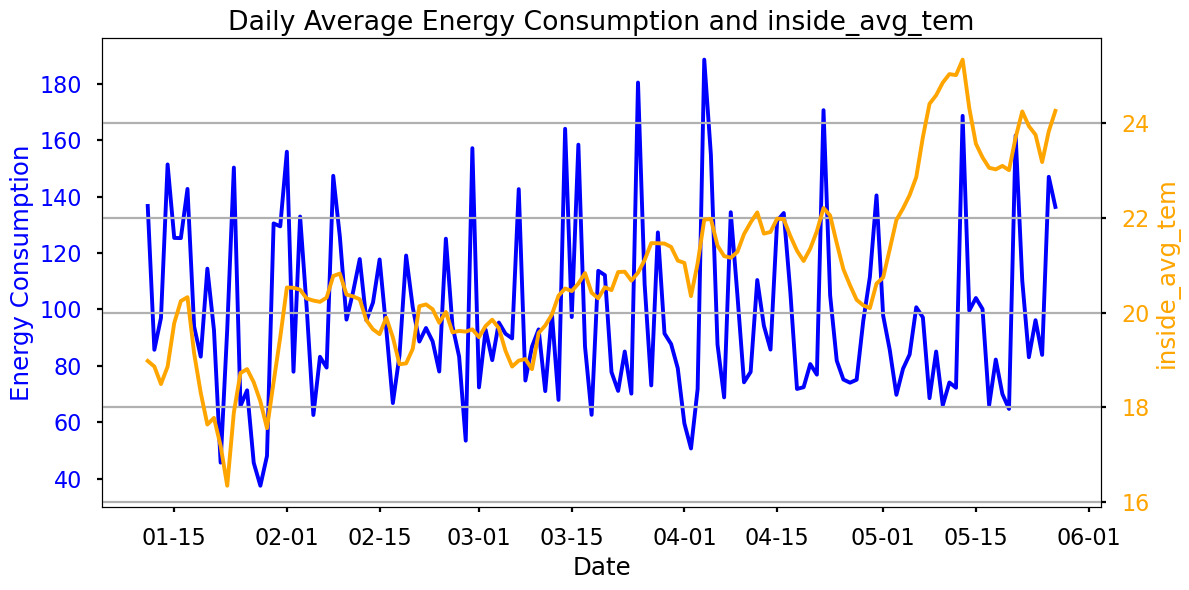

In [24]:
daily_avg = df.resample('D').mean()
variable = "inside_avg_tem"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['Appliances'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


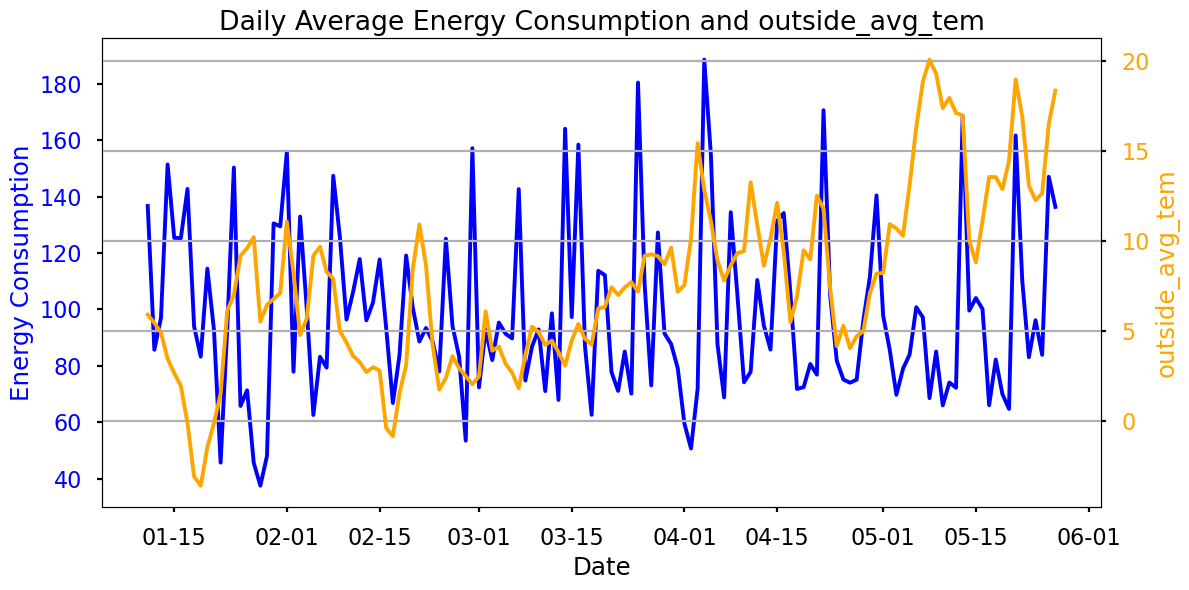

In [25]:
daily_avg = df.resample('D').mean()
variable = "outside_avg_tem"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['Appliances'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


positive

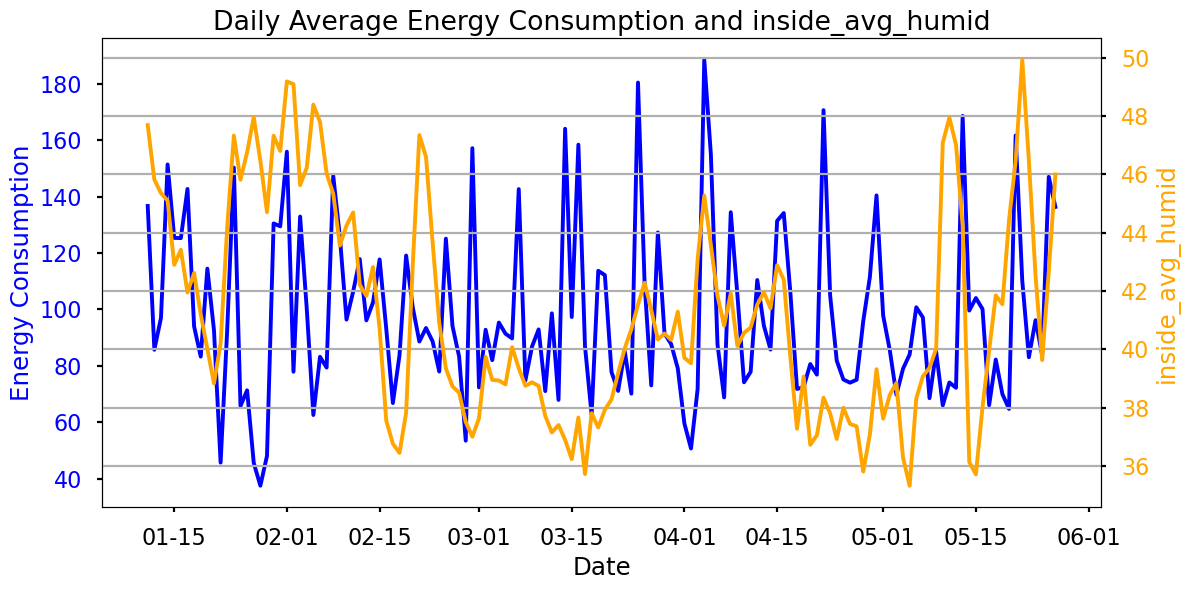

In [26]:
daily_avg = df.resample('D').mean()
variable = "inside_avg_humid"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['Appliances'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


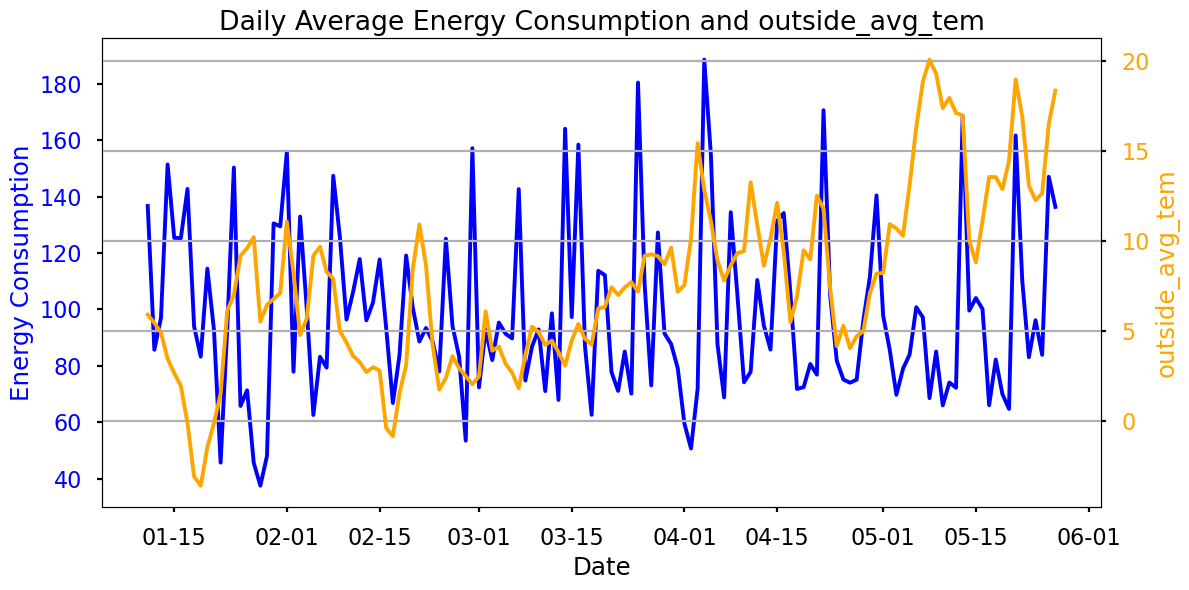

In [27]:
daily_avg = df.resample('D').mean()
variable = "outside_avg_tem"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['Appliances'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


### Applicances VS temperature / humidity

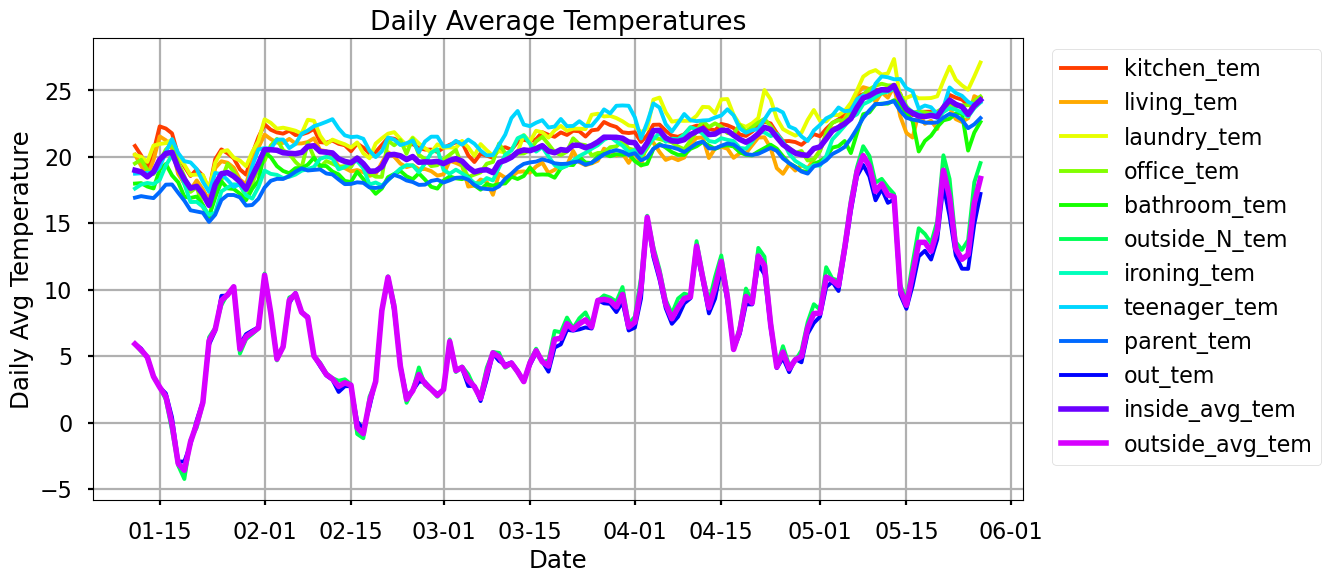

In [28]:
daily_avg = df.resample('D').mean()

plt.figure(figsize=(12, 6))

temperature_columns = [col for col in df.columns if 'tem' in col]
cmap = sns.color_palette("gist_rainbow", n_colors=len(temperature_columns))  # Use a colormap with unique colors for each temperature column

for i, col in enumerate(temperature_columns):
    if col in ['inside_avg_tem', 'outside_avg_tem']:
        # Highlight "tem_inside_avg" and "tem_outside_avg" with a different line style or color
        plt.plot(daily_avg.index, daily_avg[col], label=f'{col}', color=cmap[i], linewidth=4)
    else:
        plt.plot(daily_avg.index, daily_avg[col], label=f'{col}', color=cmap[i])

#     plt.plot(daily_avg.index, daily_avg[col], label=f'{col}', color=cmap[i])

plt.xlabel('Date')
plt.ylabel('Daily Avg Temperature')
plt.title('Daily Average Temperatures')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))  # Place legend outside the plot
plt.grid(True)

date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()

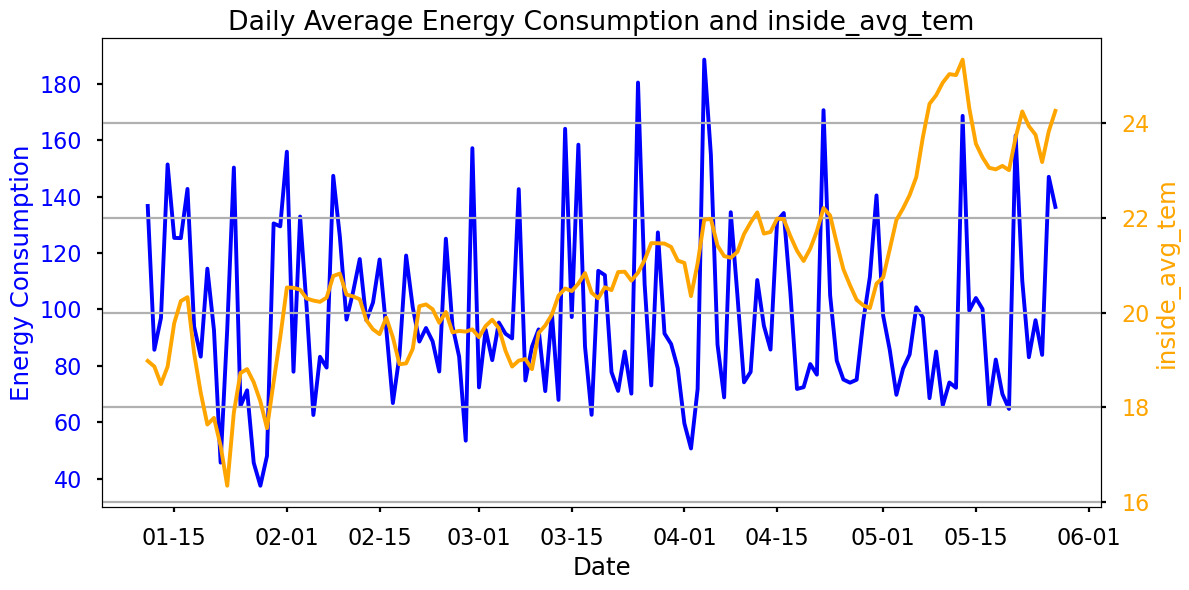

In [29]:
daily_avg = df.resample('D').mean()
variable = "inside_avg_tem"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['Appliances'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


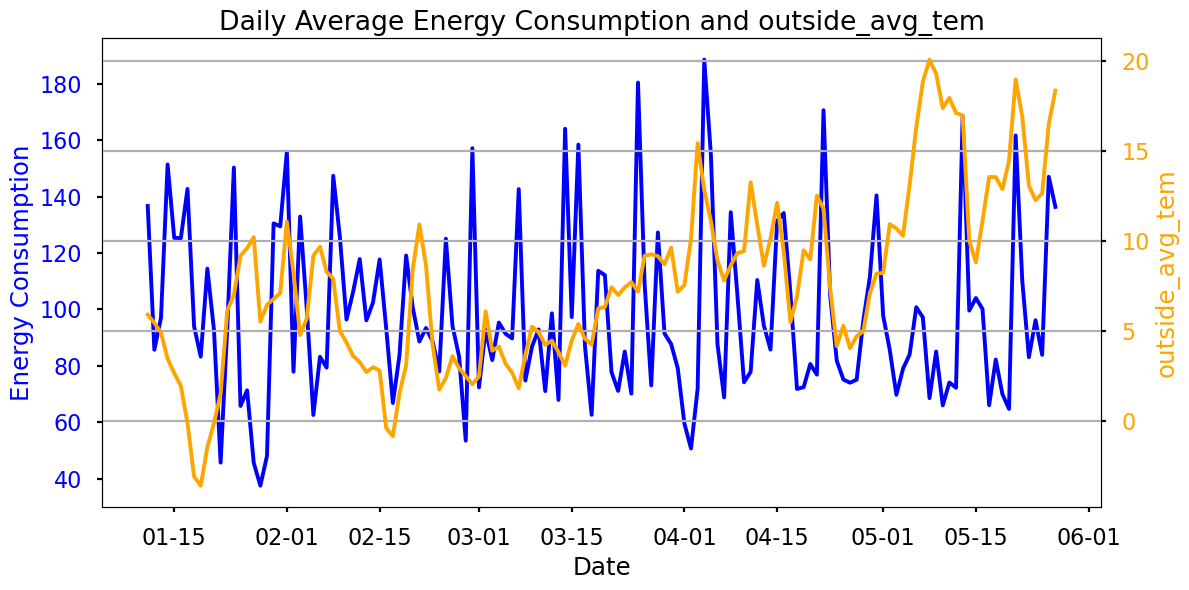

In [30]:
daily_avg = df.resample('D').mean()
variable = "outside_avg_tem"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['Appliances'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


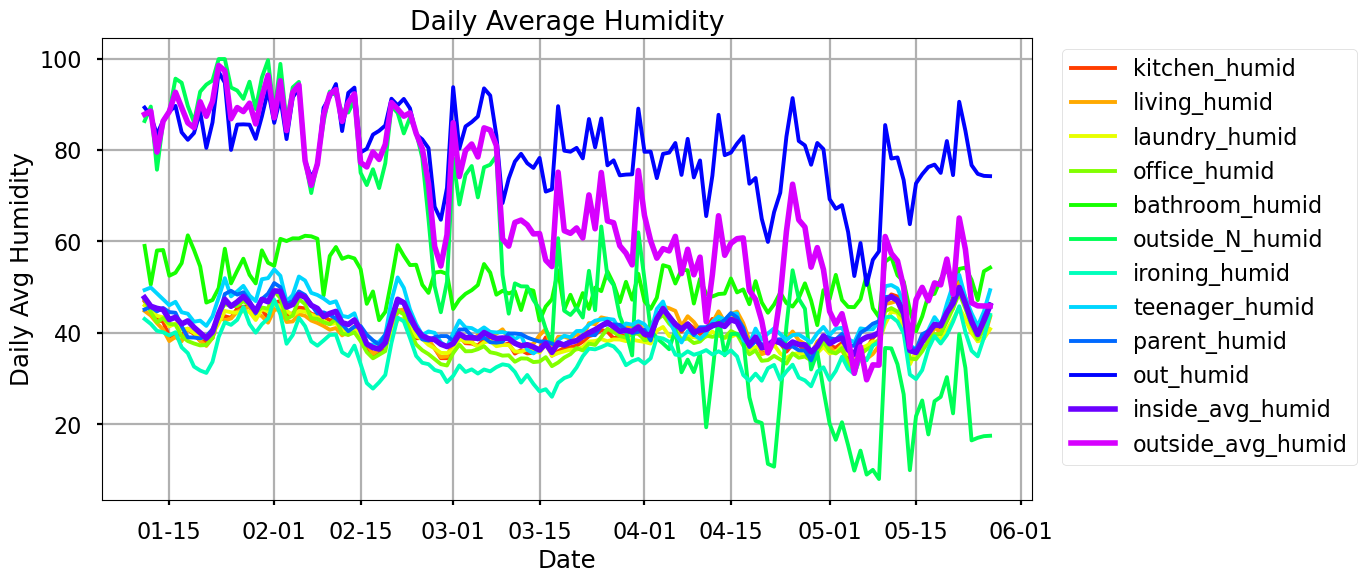

In [31]:
daily_avg = df.resample('D').mean()

plt.figure(figsize=(12, 6))

temperature_columns = [col for col in df.columns if 'humid' in col]
cmap = sns.color_palette("gist_rainbow", n_colors=len(temperature_columns))  # Use a colormap with unique colors for each temperature column

for i, col in enumerate(temperature_columns):
    if col in ['inside_avg_humid', 'outside_avg_humid']:
        # Highlight "tem_inside_avg" and "tem_outside_avg" with a different line style or color
        plt.plot(daily_avg.index, daily_avg[col], label=f'{col}', color=cmap[i], linewidth=4)
    else:
        plt.plot(daily_avg.index, daily_avg[col], label=f'{col}', color=cmap[i])

#     plt.plot(daily_avg.index, daily_avg[col], label=f'{col}', color=cmap[i])

plt.xlabel('Date')
plt.ylabel('Daily Avg Humidity')
plt.title('Daily Average Humidity')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))  # Place legend outside the plot
plt.grid(True)

date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()

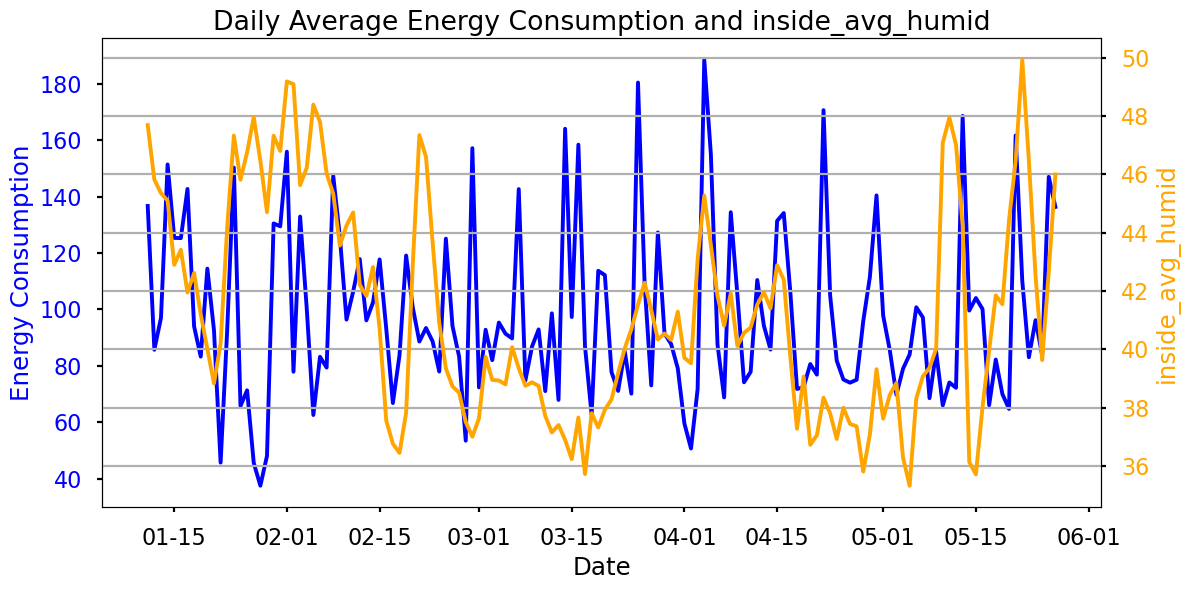

In [32]:
daily_avg = df.resample('D').mean()
variable = "inside_avg_humid"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['Appliances'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


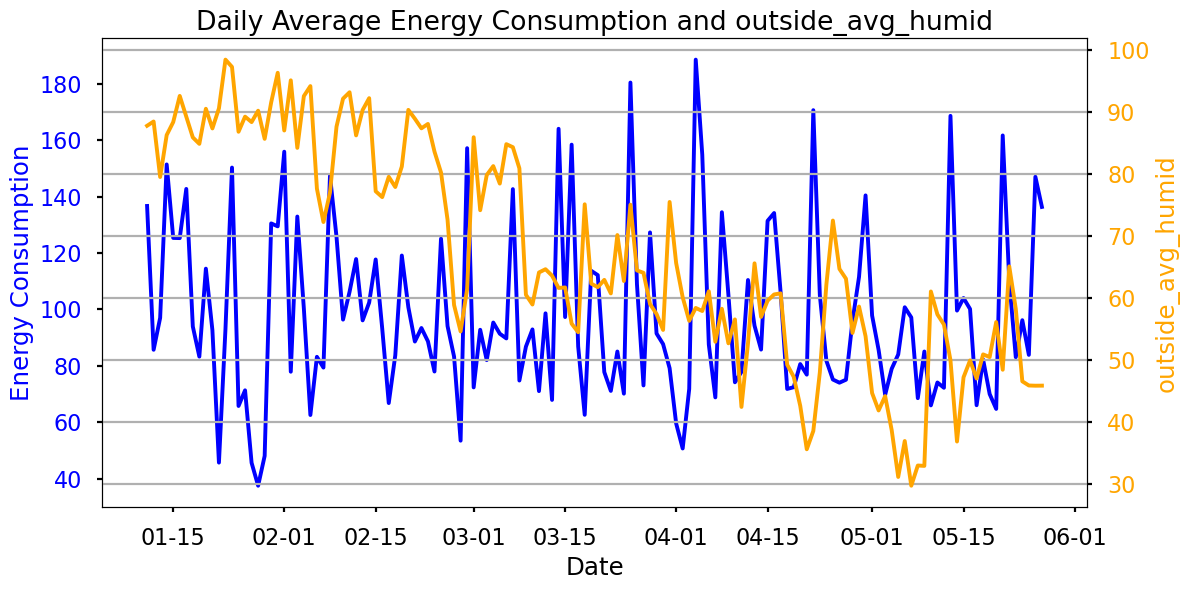

In [33]:
daily_avg = df.resample('D').mean()
variable = "outside_avg_humid"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['Appliances'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


### Lights VS temperature / humidity

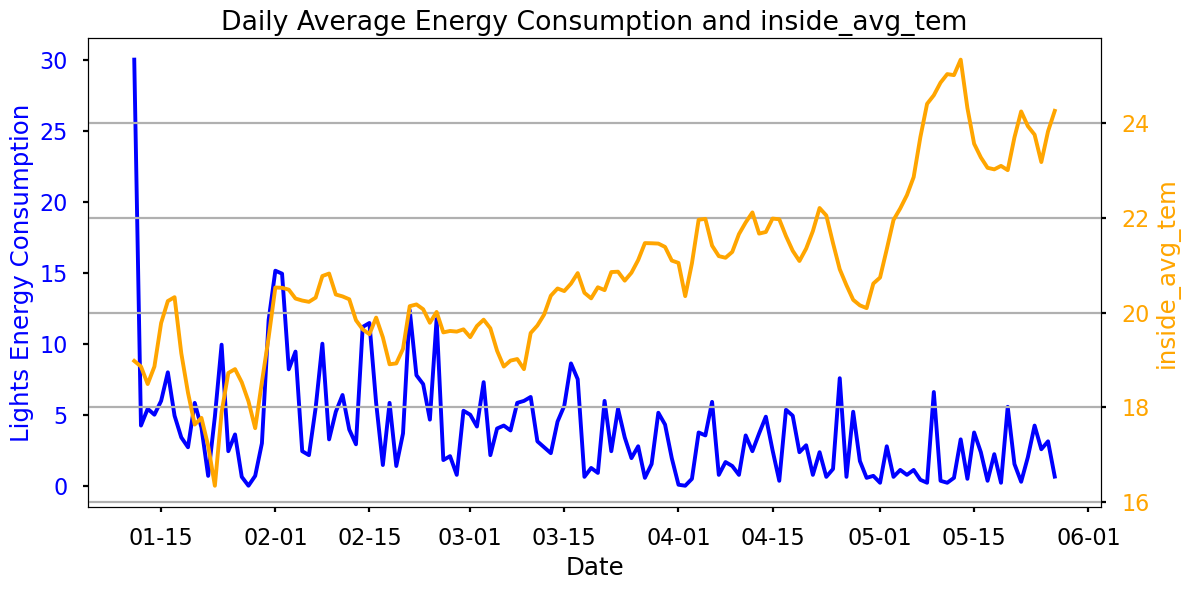

In [34]:
daily_avg = df.resample('D').mean()
variable = "inside_avg_tem"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['lights'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Lights Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


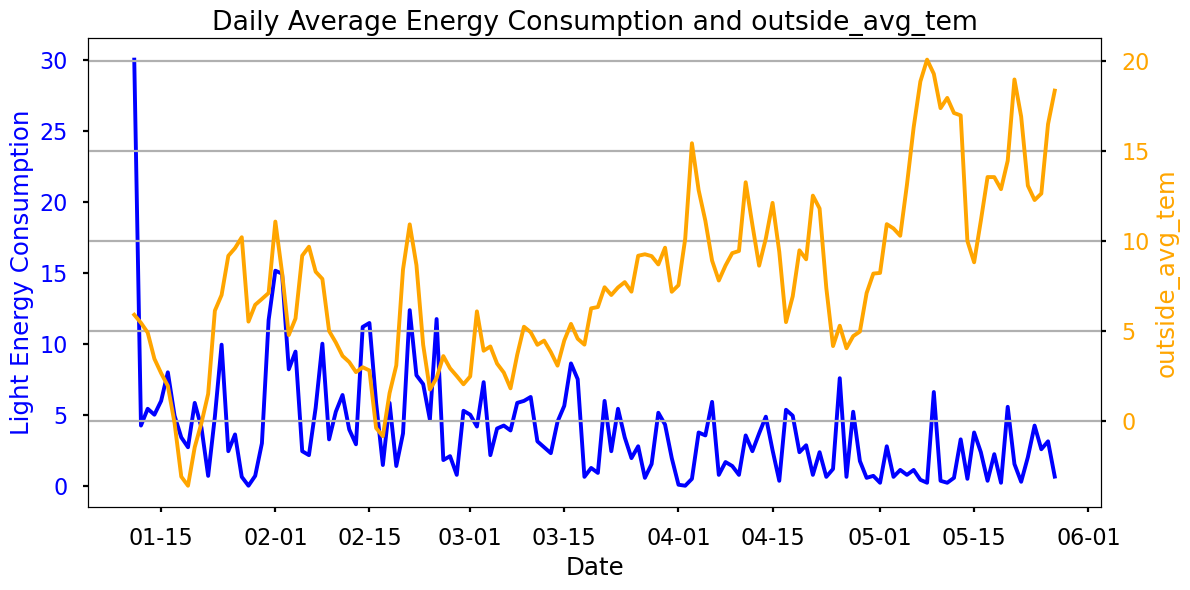

In [35]:
daily_avg = df.resample('D').mean()
variable = "outside_avg_tem"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['lights'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Light Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


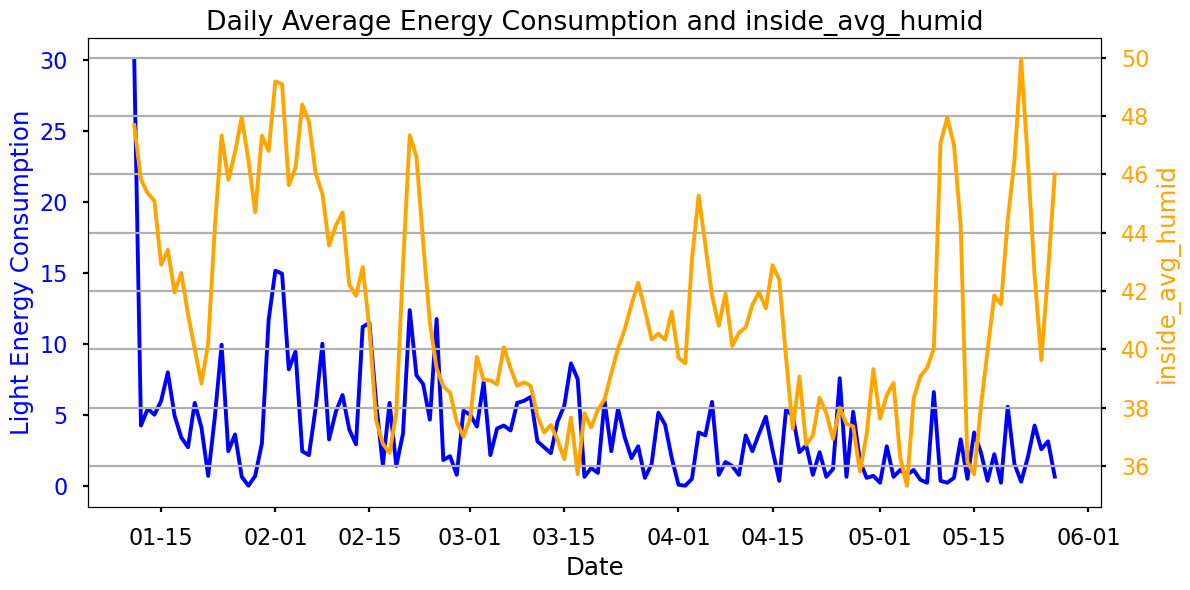

In [36]:
daily_avg = df.resample('D').mean()
variable = "inside_avg_humid"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['lights'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Light Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


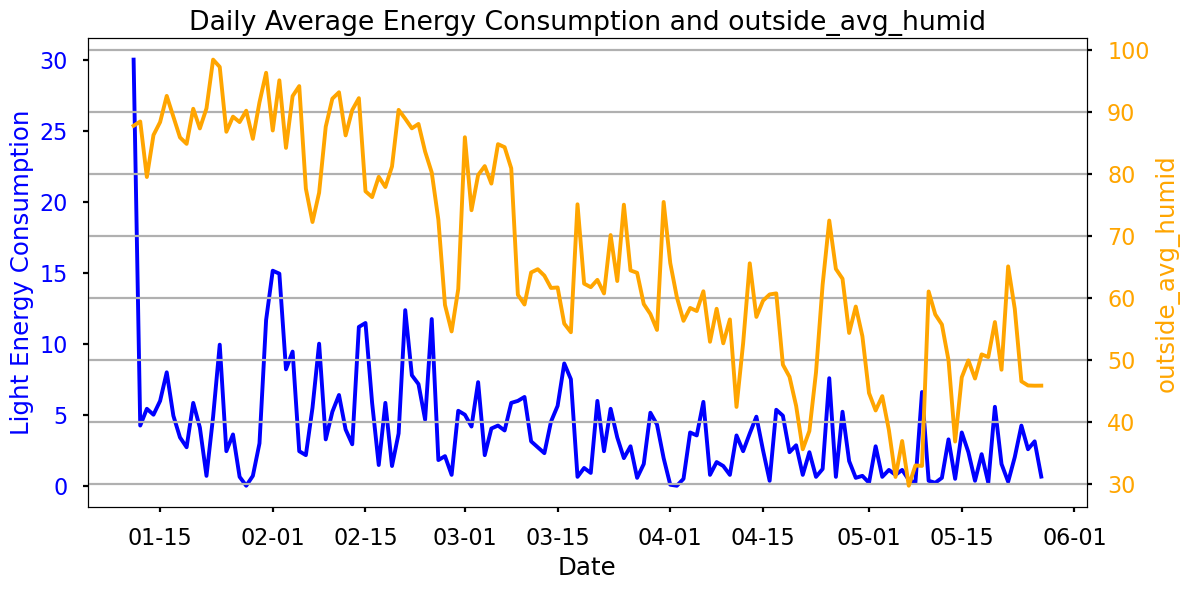

In [37]:
daily_avg = df.resample('D').mean()
variable = "outside_avg_humid"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_avg.index, daily_avg['lights'], label='Daily Avg Energy Consumption', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Light Energy Consumption', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(daily_avg.index, daily_avg[variable], label=f'Daily Avg {variable}', color='orange')
ax2.set_ylabel(f'{variable}', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Daily Average Energy Consumption and {variable}')
fig.tight_layout()
plt.grid(True)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


## Other-TRY SOME ML

In [48]:
from sklearn.model_selection import train_test_split

y = df['Appliances']
X = df.drop(columns=['Appliances','inside_avg_humid','inside_avg_tem','outside_avg_humid','outside_avg_tem'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# IMPORT THE model and define the var

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

#LinearRegression

Mean Squared Error: 8602.511594958056
R-squared: 0.1650172284857513


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_reg_model.fit(X_train, y_train)

y_pred = rf_reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")
RandomForest

Mean Squared Error: 5025.617459888532
R-squared: 0.5122001349364544


RandomForest > LinearRegression